<a href="https://colab.research.google.com/github/mvoassis/dropout_prediction/blob/main/notebooks/Student_dropout_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Dropout Predictor
> Marcos Oliveira (mvoassis@gmail.com)

Implementation of the classifier.

## Imports and dataset loading...

In [ ]:
!pip install pycaret
!pip install category-encoders
!pip install pycaret[analysis]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dados_full = pd.read_csv('discentes2023-09-tratado-full.csv')
dados_full.drop(['nome', 'grr', 'racaCor',  'dataNacimento','DEC027_nota', 'DEC027_freq'], axis=1, inplace=True)
dados_full.head()

,situacao,anoConclusaoEnsinoMedio,chIntegralizadaMatriculada,chintegralizadaACE,chintegralizadaAF,chintegralizadaCF,chintegralizadaObrigatoria,chintegralizadaOptativa,chintegralizadaTotal,fracaoChIntegralizadaTotal,...,DEC220_freq,DEE239_freq,DEE347_freq,DEE349_freq,DEE351_freq,DEE358_freq,DEE245_freq,DEE352_freq,DEE359_freq,DEE360_freq
0,0,2019,1740,0,0,0,1680,60,1740,54.1,...,0.0,87.0,100.0,100.0,93.0,100.0,100.0,94.0,100.0,97.0
1,1,0,2376,0,0,0,2340,36,2376,73.3,...,0.0,93.0,91.0,100.0,94.0,27.5,94.0,93.0,0.0,92.0
2,1,2018,645,0,0,0,615,30,645,20.1,...,0.0,0.0,0.0,92.0,0.0,0.0,0.0,91.0,0.0,0.0
3,0,2016,390,0,0,0,120,0,120,3.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2018,990,0,0,0,675,30,705,21.9,...,0.0,0.0,22.5,96.0,87.0,90.0,0.0,97.0,0.0,12.0


In [7]:
dados_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113 entries, 0 to 120
Data columns (total 68 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   situacao                    113 non-null    int64  
 1   anoConclusaoEnsinoMedio     113 non-null    int64  
 2   chIntegralizadaMatriculada  113 non-null    int64  
 3   chintegralizadaACE          113 non-null    int64  
 4   chintegralizadaAF           113 non-null    int64  
 5   chintegralizadaCF           113 non-null    int64  
 6   chintegralizadaObrigatoria  113 non-null    int64  
 7   chintegralizadaOptativa     113 non-null    int64  
 8   chintegralizadaTotal        113 non-null    int64  
 9   fracaoChIntegralizadaTotal  113 non-null    float64
 10  cidade                      113 non-null    object 
 11  formaIngInstituicao         113 non-null    object 
 12  ira                         113 non-null    float64
 13  sexo                        113 non

In [31]:
dados_full.to_csv('anonymized_dataset.csv')

## Outliers

We discerned the presence of eight students encountering academic challenges while still being officially enrolled within the system. Recognizing these instances as notable cases exhibiting a high dropout probability, we extracted them from the dataset. Their pertinent information was preserved for subsequent validation testing purposes.

<Axes: xlabel='situacao', ylabel='Reprovado por frequência'>

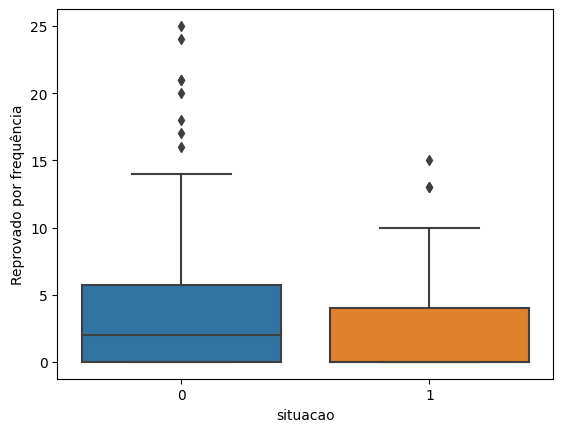

In [4]:
sns.boxplot(data= dados_full, y='Reprovado por frequência', x='situacao')

In [5]:
dados_full[['Reprovado por frequência','situacao']].query('situacao == 0 and `Reprovado por frequência` >=15').sort_values('Reprovado por frequência', ascending=False)

,Reprovado por frequência,situacao
59,25.0,0
103,24.0,0
34,21.0,0
94,21.0,0
93,20.0,0
62,18.0,0
35,17.0,0
90,16.0,0


In [6]:
indices_teste_final = dados_full.query('situacao == 0 and `Reprovado por frequência` >=15').index
teste_final = dados_full.iloc[indices_teste_final]
dados_full = dados_full.drop(indices_teste_final)
teste_final

,situacao,anoConclusaoEnsinoMedio,chIntegralizadaMatriculada,chintegralizadaACE,chintegralizadaAF,chintegralizadaCF,chintegralizadaObrigatoria,chintegralizadaOptativa,chintegralizadaTotal,fracaoChIntegralizadaTotal,...,DEC220_freq,DEE239_freq,DEE347_freq,DEE349_freq,DEE351_freq,DEE358_freq,DEE245_freq,DEE352_freq,DEE359_freq,DEE360_freq
34,0,2019,525,0,0,0,300,0,300,9.3,...,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,25.0,0.0,20.0
35,0,0,405,0,0,0,105,0,105,3.3,...,0.0,0.00,3.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0
59,0,0,345,0,0,0,105,0,105,3.3,...,0.0,0.00,0.0,88.0,0.000000,0.0,0.0,84.0,0.0,0.0
62,0,2011,1380,0,0,0,1080,30,1110,34.5,...,0.0,21.00,0.0,96.0,0.000000,0.0,97.0,95.0,0.0,14.0
90,0,2018,525,0,0,0,255,0,255,7.9,...,0.0,0.00,0.0,0.0,60.000000,0.0,0.0,0.0,0.0,0.0
93,0,2018,360,0,0,0,90,0,90,2.8,...,0.0,0.00,80.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
94,0,0,405,0,0,0,105,0,105,3.3,...,0.0,0.00,3.0,100.0,0.000000,0.0,0.0,0.0,0.0,0.0
103,0,2012,1260,0,0,0,1080,0,1080,33.6,...,0.0,86.75,55.0,96.0,41.333333,47.0,77.0,97.0,44.0,37.0


## Feature Selection

Measured the top 10 most important features of the models that support this information.

After that, we selected the 10 most frequent features among all methods.

In [8]:
dados = dados_full.copy()

In [9]:
from pycaret.classification import *
s = setup(data=dados, target = 'situacao',
          session_id = 2, train_size=0.8,
          remove_multicollinearity=True,
          multicollinearity_threshold=0.8,
          max_encoding_ohe=15
          )

,Description,Value
0,Session id,2
1,Target,situacao
2,Target type,Binary
3,Original data shape,"(113, 68)"
4,Transformed data shape,"(113, 36)"
5,Transformed train set shape,"(90, 36)"
6,Transformed test set shape,"(23, 36)"
7,Numeric features,65
8,Categorical features,2
9,Preprocess,True


In [11]:
print("Train shape:", s.X_train_transformed.shape)
print("Test shape:", s.X_test_transformed.shape)

Train shape: (90, 35)
Test shape: (23, 35)


In [12]:
best = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9000,0.9850,0.9350,0.8867,0.8963,0.8034,0.8255,0.5600
rf,Random Forest Classifier,0.8556,0.9575,0.9100,0.8333,0.8461,0.7143,0.7495,0.5000
ada,Ada Boost Classifier,0.9000,0.9450,0.9250,0.8717,0.8939,0.8002,0.8082,0.2260
xgboost,Extreme Gradient Boosting,0.8778,0.9450,0.9050,0.8633,0.8735,0.7573,0.7755,0.3240
lightgbm,Light Gradient Boosting Machine,0.8889,0.9400,0.8900,0.8900,0.8738,0.7814,0.7978,0.1910
gbc,Gradient Boosting Classifier,0.8778,0.9250,0.9100,0.8567,0.8717,0.7584,0.7765,0.2230
lda,Linear Discriminant Analysis,0.8111,0.9050,0.8650,0.7833,0.8005,0.6298,0.6593,0.1510
knn,K Neighbors Classifier,0.8667,0.8925,0.9750,0.7917,0.8704,0.7365,0.7605,0.1600
lr,Logistic Regression,0.7778,0.8300,0.8150,0.8078,0.7700,0.5691,0.6031,1.3570
qda,Quadratic Discriminant Analysis,0.7889,0.8100,0.9600,0.7000,0.8067,0.5870,0.6295,0.1480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

> Here, we individually trained each model and evaluated the "Feature Importance" option of the "evaluate_model()" function, exctracting the top 10 most relevant features for each method. As the data was evaluated on an external spreadsheet, I'm showing just one case to show the process.

In [13]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8889,1.0000,1.0000,0.8000,0.8889,0.7805,0.8000
1,0.8889,1.0000,0.7500,1.0000,0.8571,0.7692,0.7906
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.8889,0.9000,1.0000,0.8000,0.8889,0.7805,0.8000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8889,1.0000,1.0000,0.8000,0.8889,0.7805,0.8000
7,0.8889,0.9750,1.0000,0.8000,0.8889,0.7805,0.8000
8,0.7778,1.0000,1.0000,0.6667,0.8000,0.5714,0.6325


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

The final set of selected features included:

* University time (tempoUniversidade)
* City (cidade)
* Year of high school completion (anoConclusaoEnsinoMedio)
* Academic Performance Index (ira)
* DEE345_Score (DEE345_nota)
* DEE341_Attendance (DEE341_freq)
* DEE374_Attendance (DEE374_freq)
* Failures due to attendance (Reprovado por frequência)

## Classifier

Target feature - Situation (situacao):
* 0 - Enrolled
* 1 - Dropout

In [16]:
dados2 = dados[[ 'tempoUniversidade', 'DEE374_freq', 'anoConclusaoEnsinoMedio', 'Reprovado por frequência',
                                        'DEE345_nota', 'ira', 'cidade', 'DEE341_freq', 'situacao']]

In [19]:
dados2.sample(5)

,tempoUniversidade,DEE374_freq,anoConclusaoEnsinoMedio,Reprovado por frequência,DEE345_nota,ira,cidade,DEE341_freq,situacao
115,8.0,97.0,2017,0.0,0.0,0.5180,Palotina,0.0,1
22,10.0,100.0,0,0.0,0.0,0.0000,Palotina,0.0,1
82,7.0,100.0,2014,0.0,0.0,0.7638,Palotina,0.0,1
7,2.0,74.0,2019,3.0,0.0,0.3726,Palotina,74.0,0
114,2.0,0.0,2022,0.0,0.0,0.0000,Brasília,0.0,0


In [20]:
from pycaret.classification import *
s2 = setup(data=dados2, target = 'situacao',
          session_id = 3, train_size=0.8,
          # fix_imbalance=True,
          remove_multicollinearity=True,
          multicollinearity_threshold=0.8,
          # remove_outliers=True,
          # feature_selection_estimator=True,
          # normalize=True,
          max_encoding_ohe=15,
          )

,Description,Value
0,Session id,3
1,Target,situacao
2,Target type,Binary
3,Original data shape,"(113, 9)"
4,Transformed data shape,"(113, 9)"
5,Transformed train set shape,"(90, 9)"
6,Transformed test set shape,"(23, 9)"
7,Numeric features,7
8,Categorical features,1
9,Preprocess,True


In [21]:
best2 = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9000,0.9550,0.9500,0.8500,0.8944,0.8002,0.8100,0.7870
ada,Ada Boost Classifier,0.8889,0.9100,0.8750,0.8850,0.8694,0.7737,0.7848,0.1560
et,Extra Trees Classifier,0.8444,0.9050,0.8500,0.8567,0.8317,0.6907,0.7171,0.2170
xgboost,Extreme Gradient Boosting,0.7556,0.9050,0.6950,0.7750,0.6996,0.5117,0.5317,0.0990
rf,Random Forest Classifier,0.7444,0.9025,0.6700,0.7895,0.6839,0.4902,0.5130,0.4580
lda,Linear Discriminant Analysis,0.7667,0.8950,0.7400,0.7650,0.7279,0.5328,0.5537,0.0720
gbc,Gradient Boosting Classifier,0.7333,0.8850,0.7200,0.7545,0.6873,0.4738,0.5046,0.1420
nb,Naive Bayes,0.6333,0.8650,1.0000,0.5554,0.7133,0.3048,0.4213,0.0770
knn,K Neighbors Classifier,0.7889,0.8425,0.8250,0.7521,0.7811,0.5805,0.5928,0.0970
lightgbm,Light Gradient Boosting Machine,0.7556,0.8350,0.6950,0.7967,0.6922,0.5104,0.5444,0.4060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

The system's ability to occasionally misclassify enrolled students with similar attributes to dropout students (i.e., generating some false-positive results) is essential.

Simultaneously, it is crucial to minimize false negatives, ensuring that actual dropout students are not misclassified as enrolled students, as this would imply that the system fails to capture the characteristics of a dropout student.

> This informations was collected individually for each method. In the current notebook, I'll show just one case to summarize the process.

In [22]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5556,1.0000,0.2000,1.0000,0.3333,0.1818,0.3162
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.5556,0.8000,0.5000,0.5000,0.5000,0.1000,0.1000
3,0.5556,0.8500,0.2500,0.5000,0.3333,0.0526,0.0598
4,0.6667,0.8500,0.7500,0.6000,0.6667,0.3415,0.3500
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.6667,0.7500,0.7500,0.6000,0.6667,0.3415,0.3500
7,0.8889,0.9000,1.0000,0.8000,0.8889,0.7805,0.8000
8,0.7778,0.9500,0.7500,0.7500,0.7500,0.5500,0.5500


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [23]:
evaluate_model(xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

We meticulously assessed these false-positive cases' information through consultations with the advisory team and the university system data. Following this thorough investigation, we concluded that three students from the test dataset could be considered potential dropout students. Consequently, we eliminated using Naive Bayes and Quadratic Discriminant Analysis, as both models misclassified four regularly enrolled students.

Subsequently, we analyzed the five remaining classification methods: *Extra Trees, XGBoost, kNN, LightGBM, and Decision Tree*.

I subjected them to hyperparameter optimization to further refine the model selection process. The models underwent optimization with **Recall** as the primary guiding metric to improve their performance concerning the classification of positive cases.

In [24]:
tune_best2 = tune_model(xgboost, optimize='Recall', n_iter=50)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.6667,1.0000,1.0000,0.5714,0.7273,0.3721,0.4781
2,0.7778,0.8000,1.0000,0.6667,0.8000,0.5714,0.6325
3,0.7778,0.9000,1.0000,0.6667,0.8000,0.5714,0.6325
4,0.5556,0.6500,1.0000,0.5000,0.6667,0.1818,0.3162
5,0.8889,1.0000,1.0000,0.8000,0.8889,0.7805,0.8000
6,0.6667,0.6500,1.0000,0.5714,0.7273,0.3721,0.4781
7,0.7778,0.9500,1.0000,0.6667,0.8000,0.5714,0.6325
8,0.6667,0.8000,1.0000,0.5714,0.7273,0.3721,0.4781


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [25]:
evaluate_model(tune_best2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
pred = predict_model(tune_best2)
pred[pred.situacao!=pred.prediction_label]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9130,0.9385,1.0000,0.8333,0.9091,0.8271,0.8397


,tempoUniversidade,DEE374_freq,anoConclusaoEnsinoMedio,Reprovado por frequência,DEE345_nota,ira,cidade,DEE341_freq,situacao,prediction_label,prediction_score
6,8.0,100.0,2015,3.0,35.5,0.5445,Palotina,0.0,0,1,0.5668
20,8.0,33.5,2019,12.0,11.5,0.4827,Marechal Cândido Rondon,90.0,0,1,0.9838


LightGBM generated no false-positive values, indicating its inability to identify potential dropout students.

Decision Tree and XGBoost performed admirably in terms of identifying possible dropout students. Decision Tree successfully identified the three potential dropout students in the test dataset but misclassified four actual dropout students as enrolled students.

Therefore, after careful consideration, we selected the XGBoost Classifier as the primary engine for the dropout detection system.

## Test with known probable dropout students

In [27]:
teste_final2 = teste_final[['tempoUniversidade', 'DEE374_freq', 'anoConclusaoEnsinoMedio', 'Reprovado por frequência',
                                        'DEE345_nota', 'ira', 'cidade', 'DEE341_freq', 'situacao']]
pred = predict_model(tune_best2,teste_final2)
pred

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.0000,0,0.0000,0.0000,0.0000,0.0000,0.0000


,tempoUniversidade,DEE374_freq,anoConclusaoEnsinoMedio,Reprovado por frequência,DEE345_nota,ira,cidade,DEE341_freq,situacao,prediction_label,prediction_score
34,8.0,25.00,2019,21.0,0.0,0.2303,Assis Chateaubriand,40.0,0,1,0.9951
35,8.0,31.40,0,17.0,0.0,0.1613,Palotina,15.0,0,1,0.9933
59,10.0,38.75,0,25.0,0.0,0.1321,Assis Chateaubriand,23.5,0,1,0.9941
62,18.0,0.00,2011,18.0,12.0,0.4100,Palotina,0.0,0,1,0.9725
90,8.0,48.50,2018,16.0,0.0,0.2209,Palotina,74.0,0,1,0.9539
93,8.0,25.00,2018,20.0,0.0,0.1469,Curitiba,53.5,0,1,0.9907
94,8.0,31.40,0,21.0,0.0,0.1386,Palotina,15.0,0,1,0.9933
103,12.0,88.00,2012,24.0,0.0,0.3519,Marechal Cândido Rondon,0.0,0,1,0.9880


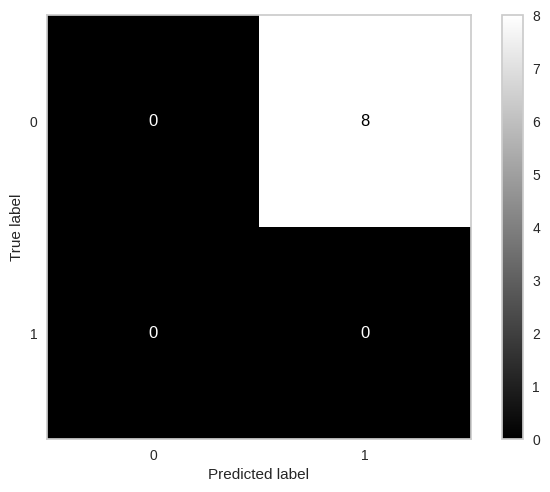

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Suponha que você tenha rótulos reais e previsões
y_true = pred.situacao #[0, 0, 0, 0, 0, 0, 0, 0]
y_pred = pred.prediction_label

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
# cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="gray", values_format='d')
plt.grid(False)
plt.savefig('confusion.png')

## Saving final model

In [29]:
def save_model(model,name):
    import pickle
    arquivo = name + '.pkl'
    with open(arquivo,'wb') as file:
        pickle.dump(model,file)
    print('Model sklearn saved: ',name)

In [33]:
save_model(tune_best2,'xgboost_tuned')

Model sklearn saved:  xgboost_tuned
